## Python e Banco de Dados

### APIs usadas por linguagens populares para se conectar com SQL-based DBMS Systems

| Application or Database | SQL API |
|-------------------------|---------|
| MySQL | MySQL C API |
| PostgreSQL | psycopg2 |
| IBM DB2 | ibm_db |
| SQL Server | dblib API |
| Database access for Microsoft Windows OS | ODBC |
| Oracle | OCI |
| Java | JDBC |

### Python Database-API 

|  Database | SQL API |
|-------------------------|---------|
| Compose for MySQL | MySQL Connector/Python |
| Compose for PostgreSQL | psycopg2 |
| IBM DB2 | ibm_db |
| Compose for MongoDB | PyMongo |


In [ ]:
from dbmodule import connect 

# Cria Connection object

Connection = connect('databasename', 'username', 'pswd')

# Cria Cursor object

Cursor = Connection.cursor()

# Run Queries

Cursor.execute('select * from my table')
Results = Cursor.fetchall()

# Libera os recursos

Cursor.close()
Connection.close()


#### Exemplo de programa em Python para trabalhar com banco de dados em SQLite

In [2]:
# Importar a biblioteca (sqlite3 já vem com Python)
import sqlite3

# Fecha conexão anterior se existir (evita "database is locked")
with sqlite3.connect('INSTRUCTOR.db') as conn:  # evitar ter que usar conn.close no fim do programa

# Cria o objeto connect e cursor
    cursor_obj = conn.cursor()

    # Usar o cursor para dropar a tabela se ela já existir
    cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

    # Cria a variável table que contém um query e executa ela com o objeto cursor
    table = """CREATE TABLE IF NOT EXISTS INSTRUCTOR (
        ID INTEGER PRIMARY KEY NOT NULL, 
        FNAME VARCHAR(20), 
        LNAME VARCHAR(20), 
        CITY VARCHAR(20), 
        CCODE CHAR(2)
    );"""
    cursor_obj.execute(table)
    print("Table is Ready")

    # Preenche a tabela com 3 linhas
    cursor_obj.execute('''INSERT INTO INSTRUCTOR VALUES (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')
    cursor_obj.execute('''INSERT INTO INSTRUCTOR VALUES (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

    statement = '''SELECT * FROM INSTRUCTOR'''
    cursor_obj.execute(statement)

    print("\nAll the data")
    output_all = cursor_obj.fetchall()  # Podia usar cursor_obj.fetchmany(n) para fetch n linhas
    for row_all in output_all:
        print(row_all)

    # Atualiza a tabela
    query_update = '''UPDATE INSTRUCTOR SET CITY='MOOSETOWN' WHERE FNAME = 'Rav' '''
    cursor_obj.execute(query_update)

    statement_2 = '''SELECT * FROM INSTRUCTOR'''
    cursor_obj.execute(statement_2)

    print("\nAll the new data")
    output1 = cursor_obj.fetchmany(2)
    for row in output1:
        print(row)

    # Colocar dados num dataframe do Pandas

    import pandas as pd
    df = pd.read_sql_query("SELECT * FROM INSTRUCTOR;", conn)

    print("\nDataFrame:")
    print(df)
    print(f"\nPrimeiro LNAME: {df.LNAME[0]}")
    print(f"Shape: {df.shape}")

    # conn.close() -> Fecha a conexão ao final


Table is Ready

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')

All the new data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')

DataFrame:
   ID FNAME      LNAME       CITY CCODE
0   1   Rav      Ahuja  MOOSETOWN    CA
1   2  Raul      Chong    Markham    CA
2   3  Hima  Vasudevan    Chicago    US

Primeiro LNAME: Ahuja
Shape: (3, 5)


#### Acesso a SQL com SQL Magic

São comandos especiais em Notebooks Jupyter que adicionam funcionalidade especiais. Não são código válido em Python MAS afetam o comportamento do notebook. Foram feitos para resolver problemas clássicos e comuns de análise de dados. Eles vêm em dois tipos:

* Line Magics: Comandos pré fixados com `%` e operam numa única linha de input
* Cell Magics: Comandos pré fixados com `%%` e operam em várias linhas de input

| Line Magics | Uses |
|-------------|------|
| %pwd | prints the current working directory |
| %ls | lists all files in the current directory |
| %history | shows the command history |
| %reset | resets the namespace by removing all names defined by the user |
| %who | lists all variables in the namespace |
| %whos | provides more detailed information about all variables in the namespace |
| %matplotlib inline | makes matplotlib plots appear within the notebook |
| %timeit | times the execution of a single statement |
| %lsmagic | lists all available line magics |

Exemplos:

`%%timeit`

<statement_1> <br>
<statement_2> <br>
<statement_3>

`%%writefile myfile.txt`

<statement_1> <br>
<statement_2> <br>
<statement_3>


####  Usando SQL Magic no Jupyter Notebook

In [1]:
# Instalar as dependências necessárias (usando --break-system-packages para Linux)
%pip install ipython-sql prettytable --break-system-packages -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Carregar a extensão SQL Magic e conectar ao banco
%load_ext sql
%sql sqlite:///SQLiteMagic.db

In [3]:
%%sql
DROP TABLE IF EXISTS INTERNATIONAL_STUDENT_TEST_SCORES;

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
    country VARCHAR(50),
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    test_score INT
);

INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53);

 * sqlite:///SQLiteMagic.db
Done.
Done.
99 rows affected.


[]

In [ ]:
# Usando variáveis Python nos statements SQL
country = 'Canada'
%sql SELECT FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE country = :country

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [5]:
# Salvando resultados de Queries em variáveis Python
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" FROM INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
Done.


Test_Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


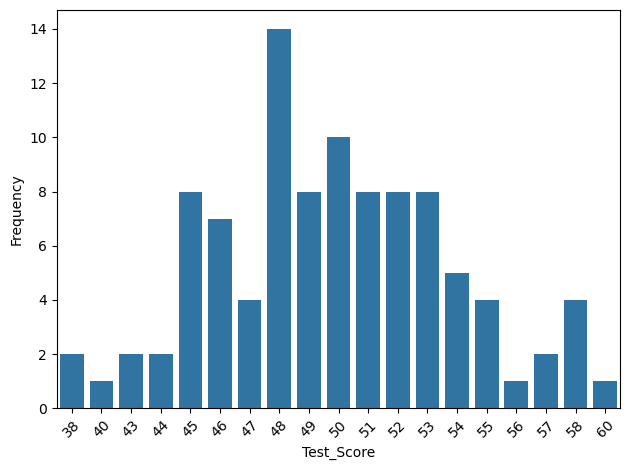

In [6]:
# Convertendo os resultados das Queries em DataFrames e criando gráfico
import seaborn
import matplotlib.pyplot as plt

dataframe = test_score_distribution.DataFrame()

%matplotlib inline

# Criar o gráfico de barras
plot = seaborn.barplot(x="Test_Score", y="Frequency", data=dataframe)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Análise de dados com Python

In [ ]:
import pandas as pd
import sqlite3

data = pd.read_csv('./menu.csv') # método panda para criar um dataframe ao ler um arquivo csv
with sqlite3.connect('McDonalds.db') as conn:
    data.to_sql('MCDONALDS_NUTRITION', conn) # método panda para criar uma tabela sql ao ler um dataframe

    df = pd.read_sql('SELECT * FROM MCDONALDS_NUTRITION', conn) # método panda para criar um dataframe ao ler um arquivo sql
    print(df)
    df.describe(include = 'all') # método panda que faz diversas operações matemáticas na tabela para facilitar a análise de dados

    # Agora, usar visualização de dados com matplotlib e seaborn para ver qual alimento possui a maior quantidade de sódio

    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

    plot = sns.swarmplot(x = "Category", y='Sodium', data=df) # cria um objeto plot que é um gráfico do tipo "Swarmplot", com o eixo x = 'Category" e o eixo y = "Sodium", usando o dataframe df como referência

    plt.setp(plot.get_xticklabels(), rotation=70) #não sei
    plt.title('Sodium Content') # adiciona título ao gráfico
    plt.show() # exibe o gráfico

    df['Sodium'].describe() # descreve detalhes extras sobre a coluna Sodium
    df['Sodium'].idxmax() # verifica qual elemento da coluna Sodium possui maior quantidade e retorna o index desse elemento
    df.at[82, 'Item'] # retorna o 40 piece de chicken mcnuggets. O método ".at" permite visualizar o elemento de linha de index 82 na coluna item

    plot = sns.jointplot(x = 'Protein', y = 'Total Fat', data=df) #Scatter Plot -> várias bolinhas com um x e y para cada item e um histogram em cada eixo
    plot.show()

    plot = sns.set_style('whitegrid')
    ax = sns.boxplot(x=df['Sugars'])
    plot.show()


#### Analisando um data set real com Python e SQL

Nesta atividade, estarei analisando Incadores Socioeconômicos em Chicago entre 2008-2012. Aqui estão as variáveis que estarão sob análise:



* Community Area Number (ca): Used to uniquely identify each row of the dataset

* Community Area Name (community_area_name): The name of the region in the city of Chicago

* Percent of Housing Crowded (percent_of_housing_crowded): Percent of occupied housing units with more than one person per room

* Percent Households Below Poverty (percent_households_below_poverty): Percent of households living below the federal poverty line

* Percent Aged 16+ Unemployed (percent_aged_16_unemployed): Percent of persons over the age of 16 years that are unemployed

* Percent Aged 25+ without High School Diploma (percent_aged_25_without_high_school_diploma): Percent of persons over the age of 25 years without a high school education

* Percent Aged Under 18 or Over 64:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)

* Per Capita Income (per_capita_income_): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* Hardship Index (hardship_index): Score that incorporates each of the six selected socioeconomic indicators


In [1]:
%pip install ipython-sql
%pip install seaborn
%load_ext sql

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv, sqlite3
import seaborn as sns

with sqlite3.connect("socioeconomic.db") as con:
    cur = con.cursor()

In [3]:
%pip install pandas
%sql sqlite:///socioeconomic.db

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False, method='multi')

78

In [5]:
%pip install ipython-sql prettytable

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [7]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Problema 1 - Quantas linhas há no dataset?

In [8]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


Problema 2 - Quantas áreas comunitárias em Chicago possuem hardship index maior que 50.0?

In [9]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


Problema 3 - Qual o valor máximo de hardship index neste dataset?

In [10]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


Problema 4 - Qual área comunitária tem o maior hardship index?

In [11]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


Problema 5 - Qual comunidade de Chicago possui renda-per-capita maior que $60,000?

In [12]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Problema 6 - Crie um scatter plot usando per_capita_income_ e hardship_index.

Note: you may need to restart the kernel to use updated packages.
 * sqlite:///socioeconomic.db
Done.
Note: you may need to restart the kernel to use updated packages.
 * sqlite:///socioeconomic.db
Done.


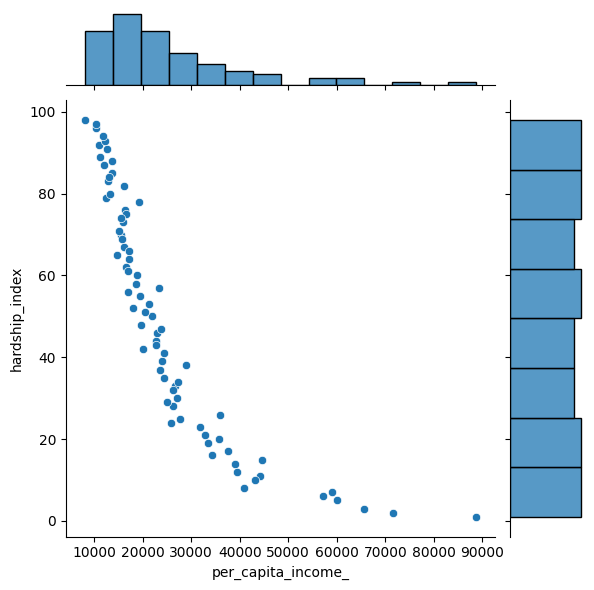

In [13]:
%pip install matplotlib seaborn
import seaborn as sns
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())